In [430]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier() 
import pandas as pd
import numpy as np


car = pd.read_csv("car_evaluation.csv")
#We can check the first five samples of the data:
car.head(10)

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [431]:
car[["buying price", "maintenance cost", "number of doors", "lug_boot", "safety"]]

,buying price,maintenance cost,number of doors,lug_boot,safety
0,vhigh,vhigh,2,small,low
1,vhigh,vhigh,2,small,med
2,vhigh,vhigh,2,small,high
3,vhigh,vhigh,2,med,low
4,vhigh,vhigh,2,med,med
...,...,...,...,...,...
1723,low,low,5more,med,med
1724,low,low,5more,med,high
1725,low,low,5more,big,low
1726,low,low,5more,big,med


In [465]:
car2 = car.values

X = []
y = []
unacc=0
acc=0
good=0
vgood=0

for ligne in car2:
    X += [ligne[0:6]]
    y += [ligne[6]]
    
    if ligne[6] == "unacc":
        unacc += 1 
    if ligne[6] == "acc":
        acc += 1 
    if ligne[6] == "good":
        good += 1
    if ligne[6] == "vgood":
        vgood += 1 

In [466]:
print("Nombre d'élement dans la classe unacc :",unacc)
print("Nombre d'élement dans la classe acc :",acc)
print("Nombre d'élement dans la classe good :",good)
print("Nombre d'élement dans la classe vgood :",vgood)

Nombre d'élement dans la classe unacc : 1210
Nombre d'élement dans la classe acc : 384
Nombre d'élement dans la classe good : 69
Nombre d'élement dans la classe vgood : 65


In [434]:
car_r = car.replace(["low", "med", "high", "vhigh", "more", "5more", "small", "big", "unacc",
                     "acc", "good", "vgood", "2", "3", "4" ],
            [1,2,3,4,5,5,1,3,1,2,3,4,2,3,4])

In [435]:
val = car_r.values

print(val)

[[4 4 2 ... 1 1 1]
 [4 4 2 ... 1 2 1]
 [4 4 2 ... 1 3 1]
 ...
 [1 1 5 ... 3 1 1]
 [1 1 5 ... 3 2 3]
 [1 1 5 ... 3 3 4]]


In [436]:
X = val[:,0:6]
y = val[:,6]

In [437]:
X.shape

(1728, 6)

In [438]:
from sklearn.model_selection import train_test_split 
X_train,  X_test,  y_train,  y_test  =  train_test_split(X,  y,  train_size=0.7, 
random_state=0)

In [439]:
X_train.shape

(1209, 6)

In [440]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier(max_depth=50, min_samples_leaf = 1) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=50)

[Text(89.67857142857143, 199.32, 'X[1] <= 3.0\ngini = 0.457\nsamples = 1728\nvalue = [1210, 384, 69, 65]'),
 Text(65.76428571428572, 163.07999999999998, 'gini = 0.0\nsamples = 576\nvalue = [576, 0, 0, 0]'),
 Text(113.59285714285714, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.579\nsamples = 1152\nvalue = [634, 384, 69, 65]'),
 Text(47.82857142857143, 126.83999999999999, 'X[1] <= 4.5\ngini = 0.518\nsamples = 288\nvalue = [182, 81, 15, 10]'),
 Text(23.914285714285715, 90.6, 'gini = 0.56\nsamples = 144\nvalue = [82, 48, 9, 5]'),
 Text(71.74285714285715, 90.6, 'gini = 0.462\nsamples = 144\nvalue = [100, 33, 6, 5]'),
 Text(179.35714285714286, 126.83999999999999, 'X[0] <= 3.5\ngini = 0.595\nsamples = 864\nvalue = [452, 303, 54, 55]'),
 Text(119.57142857142857, 90.6, 'X[1] <= 4.5\ngini = 0.582\nsamples = 288\nvalue = [156, 99, 18, 15]'),
 Text(95.65714285714286, 54.359999999999985, 'gini = 0.56\nsamples = 144\nvalue = [82, 48, 9, 5]'),
 Text(143.4857142857143, 54.359999999999985, 'gini = 0.602

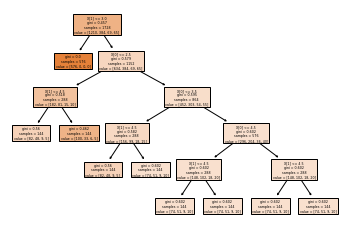

In [472]:
tree.plot_tree(clf, filled=True) 

In [441]:
clf.predict(X_test) 

array([2, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 3, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3,
       1, 1, 1, 2, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 2, 1, 4, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 3,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 4, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,

In [442]:
clf.score(X_test, y_test)

0.9807321772639692

In [443]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[1,2,3,5,10,20,50,75,100], 'min_samples_leaf':[1,2,3,5,10,20,50]}

clf = GridSearchCV(clf, parameters)

In [444]:
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 50, 'min_samples_leaf': 1}

In [471]:
clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier()>

No handles with labels found to put in legend.


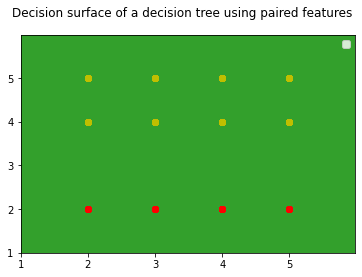

In [470]:
import numpy as np 
import matplotlib.pyplot as plt 
 
# Paramètres 
n_classes = 4
plot_colors = "bry" # blue-red-yellow 
plot_step = 0.02 
 
# Choisir les attributs longueur et largeur des pétales 
pair = [2, 3] 
 
X = val[:,0:6]
y = val[:,6]
# On ne garde seulement les deux attributs 
X = X[:, pair] 
y = y 
 
# Apprentissage de l'arbre 
clf = tree.DecisionTreeClassifier().fit(X, y) 
 
# Affichage de la surface de décision 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
xx,  yy  =  np.meshgrid(np.arange(x_min,  x_max,  plot_step),  np.arange(y_min, 
y_max, plot_step)) 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired) 

plt.axis("tight") 
 
# Affichage des points d'apprentissage 
for i, color in zip(range(n_classes), plot_colors): 
    idx = np.where(y == i) 
    plt.scatter(X[idx,  0],  X[idx,  1],  c=color, 
cmap=plt.cm.Paired) 
plt.axis("tight") 
plt.suptitle("Decision surface of a decision tree using paired features") 
plt.legend() 
plt.show()